<a href="https://colab.research.google.com/github/Mona1804/mona/blob/main/my_hotel_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.  All personally identifying information has been removed from the data.



**Explore and analyze the data to discover important factors that govern the booking.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
#setting frontsizes,frontweight,label weight for labels,tittles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15


**Mounding drive**

In [3]:

from google.colab import drive     
drive.mount('/content/drive')

Mounted at /content/drive


**CSV** **File** **location** 

In [4]:
#csv file location 
file_path=('/content/drive/MyDrive/Hotel Bookings (1).csv')

**Reading** **data**

In [5]:
#reading csv file 
df=pd.read_csv(file_path)

**Data** **Exploration**

In [6]:
#checking the shape ( rows and column numbers)
print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 119390 rows and 32 columns.


In [7]:
#checking first  5 row
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
#checking last 5 rows
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [9]:
#looking at the min,max value ,mean values etc. NAN value of mean ,25%,50%,75%, max indicate those are categorial column .
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [10]:
#looking for the data type non null entries 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Data** **description**

1.**hotel** : *hotel(resort hotel or city hotel)*

2.**is_cancelled** :is_canceled : Value indicating if the booking was canceled (1) or not (0

3.**lead**_ **time** : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

4.**arrival**_**date_year** : year of arrival date 

5.arrival_date_month : Month of arrival date

6.arrival_date_week_number : Week number of year for arrival date

7.arrival_date_day_of_month : Day of arrival date

8.stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

9.stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

10.adults : Number of adults

11.children : Number of children

12.babies : Number of babies

13.meal : Type of meal booked. Categories are presented in standard hospitality meal packages:

14.country : Country of origin.`

15.market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

16.distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

17.is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)

18.previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

19.previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

20.reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

21.assigned_room_type : Code for the type of room assigned to the booking.

22.booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

23.deposit_type : Indication on if the customer made a deposit to guarantee the booking.

24.agent : ID of the travel agency that made the booking

25.company : ID of the company/entity that made the booking or responsible for paying the booking.

26.days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

27.customer_type : Type of booking, assuming one of four categories

28.adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

29.required_car_parking_spaces : Number of car parking spaces required by the customer

30.total_of_special_requests :* Number of special requests made by the customer (e.g. twin bed or high floor)*

31.reservation_status : Reservation last status, assuming one of three categories

Canceled – booking was canceled by the customer
Check-Out – customer has checked in but already departed
No-Show – customer did not check-in and did inform the hotel of the reason why 

32.reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel






In [11]:
# creating a copy of our dataset
df1=df.copy()

In [12]:
#columns name list 
print(list(df1.columns))

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [13]:
#converting object type to the datetime 
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')
     

**data** **cleaning**

In [14]:
#checking of the duplicate rows
df1.duplicated().value_counts()    #true means duplicate rows
     


False    87396
True     31994
dtype: int64

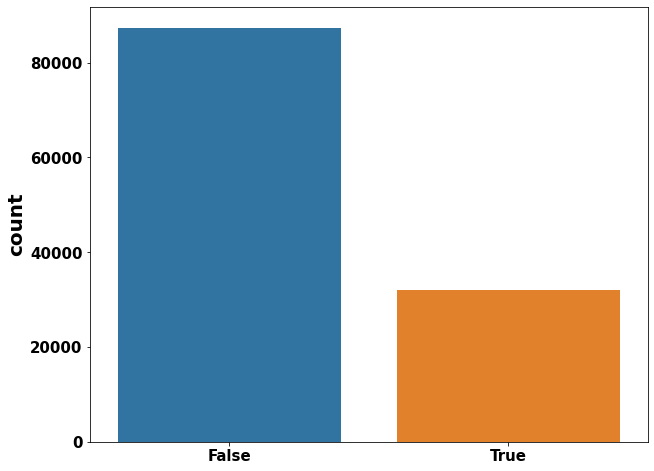

In [15]:
#Visulizing through Count pot
plt.figure(figsize=(10,8))
sns.countplot(x=df1.duplicated())


In [ ]:
so, we have 31994 duplicate rows in our data. So we will drop the duplicate rows from our data

In [16]:
#dropping the duplicate rows
df1= df1.drop_duplicates()

     

In [17]:
#data set reduced
df1.shape

(87396, 32)

In [18]:
#checking for null values
df1.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,company,82137
1,agent,12193
2,country,452
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0


Text(0.5, 1.0, 'Places of missing values in column')

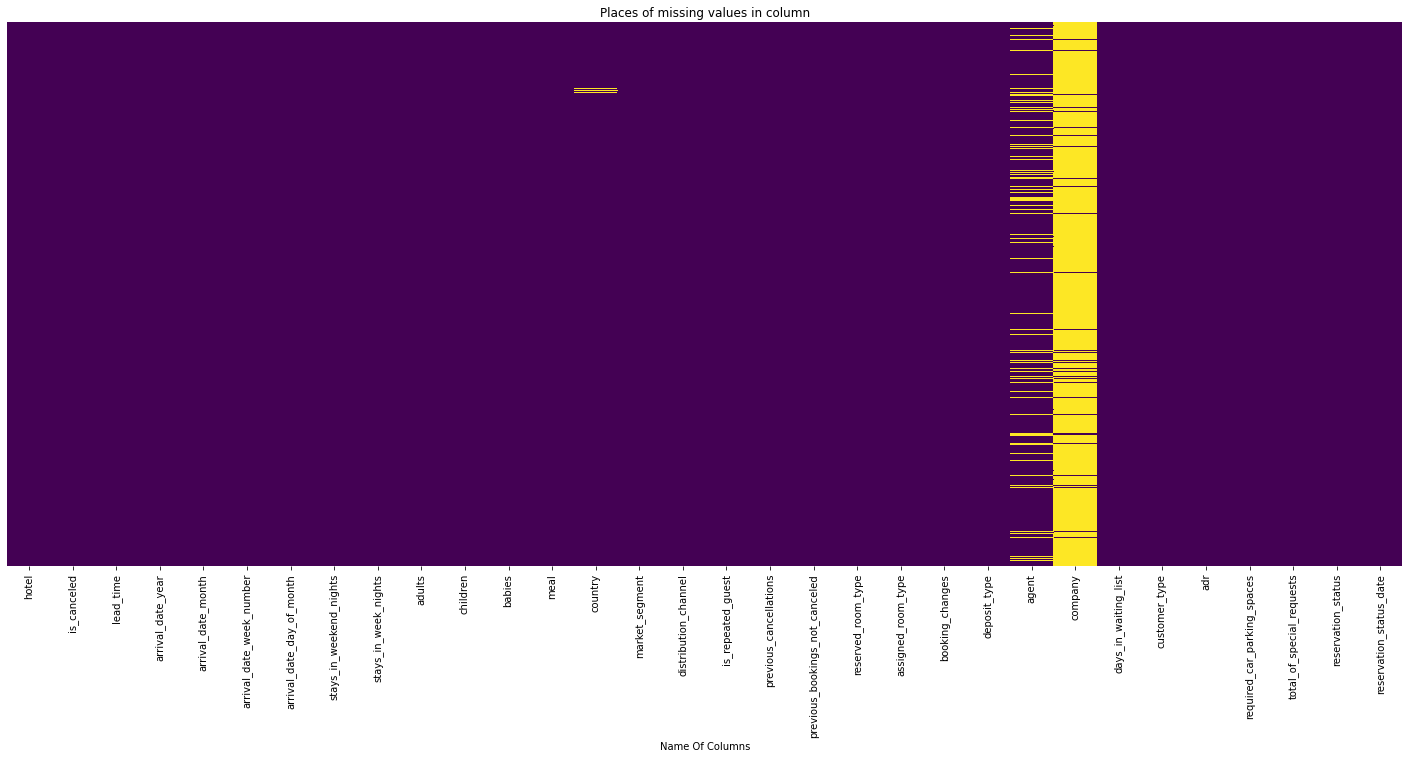

In [ ]:
# Visulaizing null values through heatmap.
plt.figure(figsize=(25, 10))
sns.heatmap(df1.isnull(), cbar=False, yticklabels=False,cmap='viridis')
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column")

So we Have Null values in columns- Company, agent, Country,children.

for company and agent I will fill the Missing values with 0
for country I will fill Missing values with boject 'Others'. ( assuming while collecting data country was not found so user selected the 'Others' option.)
AS the count of missing values in Children Column is only 4, so we can replace with 0 considering no childrens.

In [ ]:
# Filling/replacing null values with 0.
null_columns=['agent','children','company']
for col in null_columns:
  df1[col].fillna(0,inplace=True)


# Replacing NA values with 'others'
df1['country'].fillna('others',inplace=True)


In [ ]:
#Successfully handled  Null Values
df1.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})
     


,Columns,Null values
0,hotel,0
1,is_canceled,0
2,reservation_status,0
3,total_of_special_requests,0
4,required_car_parking_spaces,0
5,adr,0


In [ ]:
# droppping all 166 those rows in which addtion of of adlults ,children and babies is 0. That simply means  no bookings were made.
len(df1[df1['adults']+df1['babies']+df1['children']==0])
df1.drop(df1[df1['adults']+df1['babies']+df1['children']==0].index,inplace=True)
     


In [ ]:
# Checking the unique values in categorical columns.
categorical_cols=list(set(df1.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(df1.describe()))
for col in categorical_cols:
  print(f'Unique values in column {col} are:, {(df1[col].unique())}')


Unique values in column customer_type are:, ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in column reserved_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']
Unique values in column deposit_type are:, ['No Deposit' 'Refundable' 'Non Refund']
Unique values in column reservation_status are:, ['Check-Out' 'Canceled' 'No-Show']
Unique values in column hotel are:, ['Resort Hotel' 'City Hotel']
Unique values in column distribution_channel are:, ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in column meal are:, ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in column assigned_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']
Unique values in column market_segment are:, ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


In [ ]:
# lets add some new columns

df1['total_people'] = df1['adults'] + df1['babies'] + df1['children']   
df1['total_stay'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']   
     

In [ ]:
# Checking the final rows and columns
df1.shape

(119390, 34)

**EDA** (**Exploratory** **Data** **Analysis**)



**Univariate** **Analysis**

**1**.**Which** **Agent** **made** **the** **most** **bookings**?

In [ ]:
# return highest bookings made by agents
highest_bookings= df1.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

 # as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 

# taking top 10 bookings made by agent
top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings
     

,agent,Most_Bookings
9,9.0,28721
174,240.0,13028
14,14.0,3342
7,7.0,3294
183,250.0,2779
175,241.0,1644
27,28.0,1493
8,8.0,1383
1,1.0,1228
6,6.0,1117


Text(0.5, 1.0, 'Most Bookings Made by the agent')

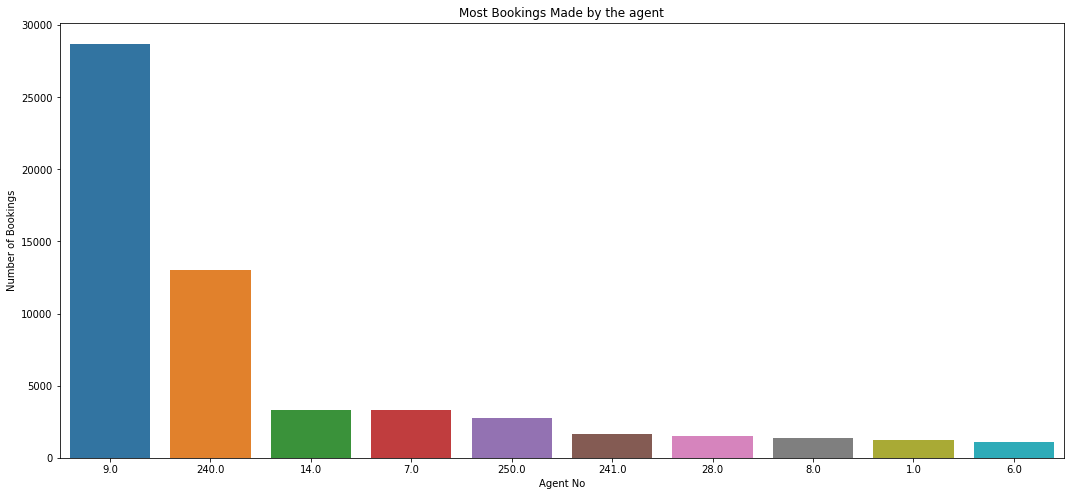

In [ ]:
#Visualizaing the graph

plt.figure(figsize=(18,8))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")

**obsevation**

Agent ID no: 9 made most of the bookings

**2**.**what** **is** **the** **percentage** **of** **repeated** **guest**?

Text(0.5, 1.0, ' Percentgae (%) of repeated guests')

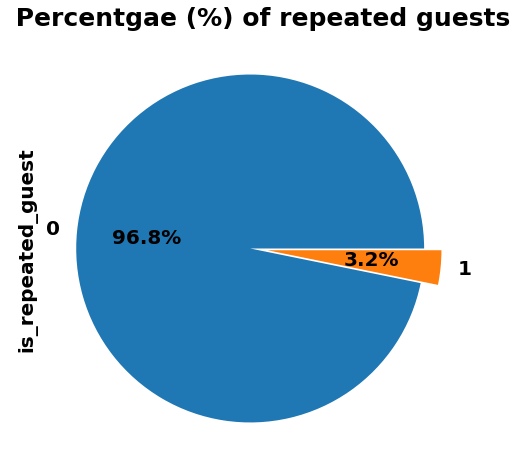

In [ ]:
df1['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=20)

plt.title(" Percentgae (%) of repeated guests")
     


**Observation**:
Repeated guests are very few which only 3.9 %.
In order to retained the guests management should take feedbacks from guests and try to imporve the services.





 **3** .**What** **is** **the** **percentage** **distribution** **of** "**Customer** **Type**"?


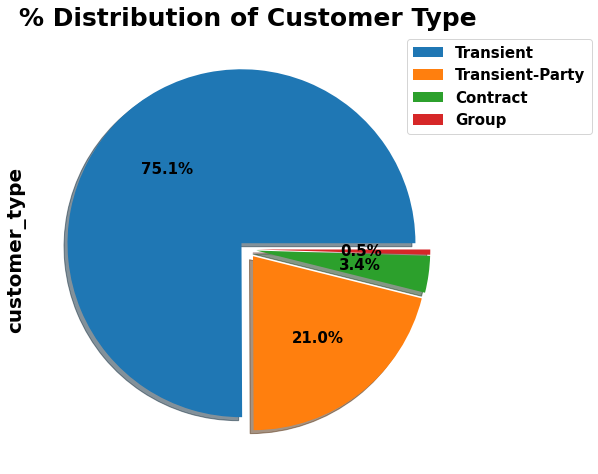

In [ ]:
df1['customer_type'].value_counts().plot.pie(explode=[0.05]*4,shadow=True,autopct='%1.1f%%',figsize=(12,8),fontsize=15,labels=None)


labels=df1['customer_type'].value_counts().index.tolist()
plt.title('% Distribution of Customer Type')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

1. Contract

when the booking has an allotment or other type of contract associated to it

2. Group

when the booking is associated to a group

3. Transient

when the booking is not part of a group or contract, and is not associated to other transient booking

4. Transient-party

when the booking is transient, but is associated to at least other transient booking

Observation:  transient customer type is more which is 75.1 %. percentage of Booking associated by the Group is very low.

**4**.**What** **is** **the** **percentage** **of** **booking** **changes** **made** **by** **the** **customer**.?

Text(0, 0.5, 'Percentage(%)')

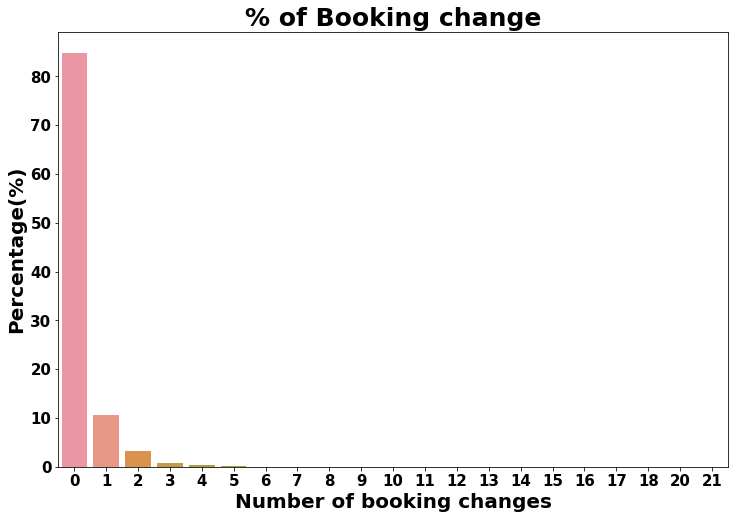

In [ ]:
booking_changes_df=df1['booking_changes'].value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})

plt.figure(figsize=(12,8))
sns.barplot(x=booking_changes_df['number_booking_changes'],y=booking_changes_df['Counts']*100/df1.shape[0])
plt.title("% of Booking change")
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')
     

0= 0 changes made in the booking
1= 1 changes made in the booking
2= 2 changes made in the booking 

Observation : Almost 82% of the bookings were not changed by guests.

5.**Which** **Distribution** **channel** **is** **mostly** **used** **for** **hotel** **bookings**?

Text(0.5, 1.0, ' Mostly Used Distribution Channel for Hotel Bookings ')

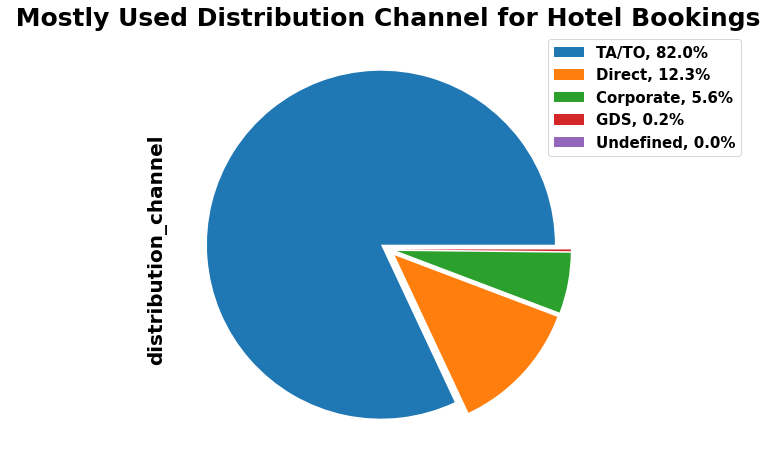

In [ ]:
# Visualizsing the by pie chart.


#Creating labels
labels=df1['distribution_channel'].value_counts().index.tolist()

# creating new df of distribution channel
distribution_channel_df=df1['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})

#adding percentage columns to the distribution_channel_df
distribution_channel_df['percentage']=round(distribution_channel_df['count']*100/df1.shape[0],1)

#Creating list of percentage
sizes=distribution_channel_df['percentage'].values.tolist()

#plotting the piw chart
df1['distribution_channel'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], shadow=False, figsize=(15,8),fontsize=10,labels=None)   

# setting legends with the percentage values
labels = [f'{l}, {s}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.title(' Mostly Used Distribution Channel for Hotel Bookings ')
     


**TA**/**TO**' **is** **mostly**(**79.1**%) **used** **for** **booking** **hotels**.


**6** .**Which** **year** **had** **the** **highest** **bookings**?

Text(0.5, 1.0, 'Year Wise bookings')

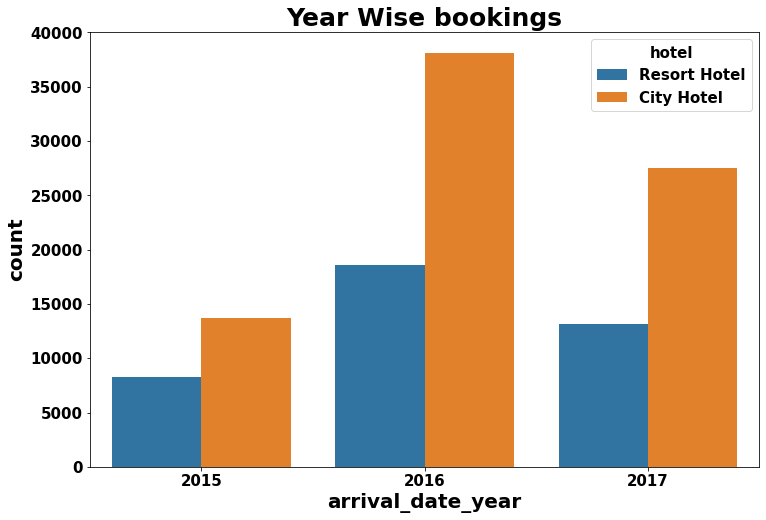

In [ ]:
# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=df1['arrival_date_year'],hue=df1['hotel'])
plt.title("Year Wise bookings")

Observation :
2016 had the higest bookings.
2015 had less 7000 bookings.
overall City hotels had the most of the bookings.


Bivariate and Multivariate Analysis

**7**) **In** **which** **month** **most** **of** **the** **bookings** **happened**?

In [19]:
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df1.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

,arrival_date_month,Counts
4,January,4693
3,February,6098
7,March,7513
0,April,7908
8,May,8355
6,June,7765
5,July,10057
1,August,11257
11,September,6690
10,October,6934


Text(0, 0.5, 'Number of bookings')

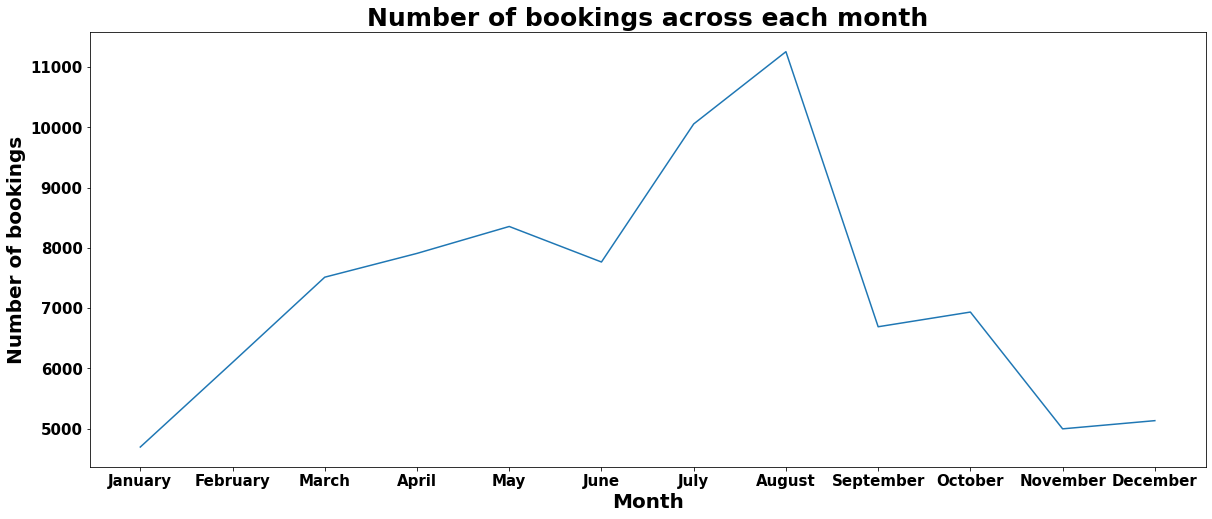

In [20]:
# set plot size
plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')

**observation** : July and August months had the most Bookings. Summer vaccation can be the reason for the bookings.

**8**)**Correlation** **of** **the** **columns**

Text(0.5, 1.0, 'Co-relation of the columns')

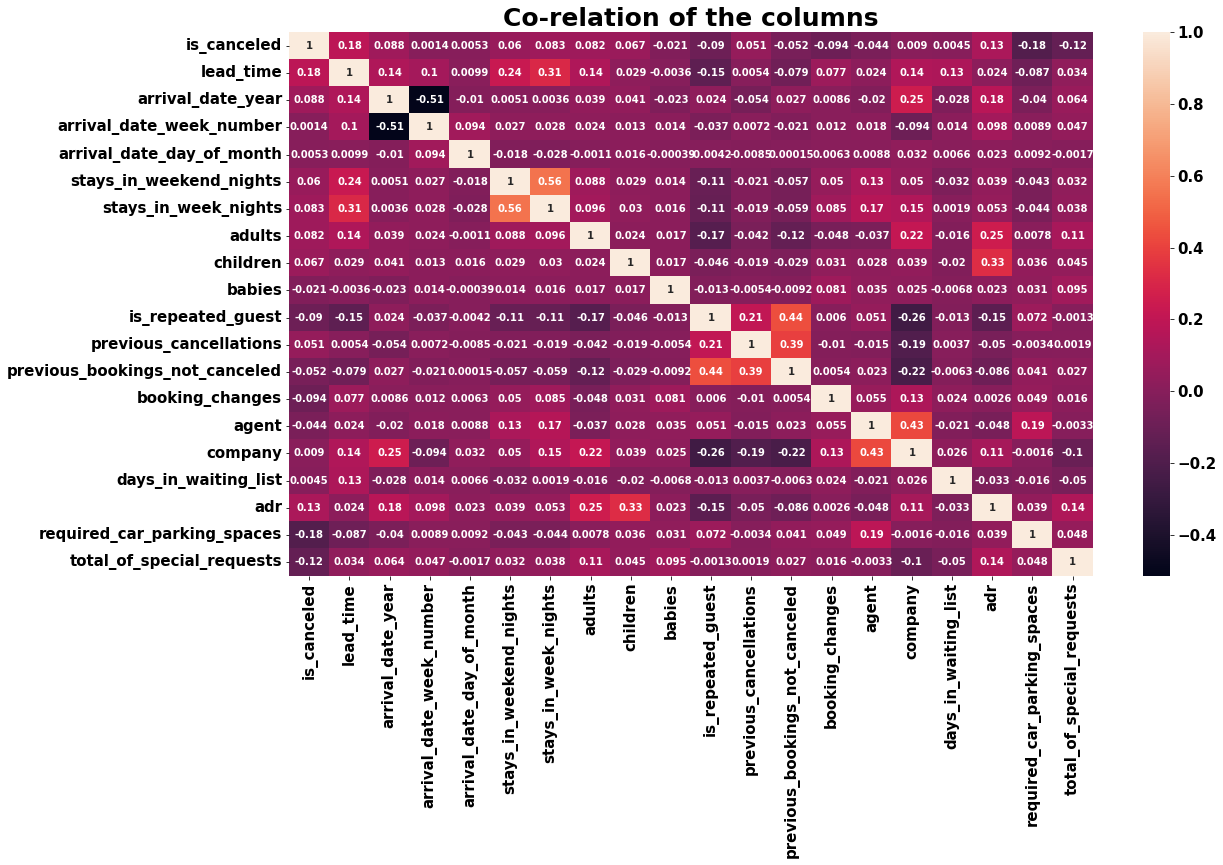

In [22]:
plt.figure(figsize=(18,10))
sns.heatmap(df1.corr(),annot=True)
plt.title('Co-relation of the columns')
     

1) is_canceled and same_room_alloted_or_not are negatively corelated. That means customer is unlikely to cancel his bookings if he don't get the same room as per reserved room. We have visualized it above.


2) lead_time and total_stay is positively corelated.That means more is the stay of cutsomer more will be the lead time.


3)adults,childrens and babies are corelated to each other. That means more the people more will be adr.

4) is_repeated guest and previous bookings not canceled has strong corelation. may be repeated guests are not more likely to cancel their bookings.

**CONCLUSION**

1.City hotels are the most preferred hotel type by the guests. We can say City hotel is the busiest hotel.

2.27.5 % bookings were got cancelled out of all the bookings.


3.Only 3.9 % people were revisited the hotels. Rest 96.1 % were new guests.
 Thus retention rate is low.

4.82% booking not changed by the guest

5 percentage of repeated guest is vry less i.e 3.2%

6.2016 had the highest booking.
 
7.The type  of customer  is transient which  is more i.e 82.4 %. percentage of Booking associated by the Group is vey low.
